In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/PauliSampling.jl`


In [4]:
using PauliPropagation
using PauliSampling
using Plots

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9


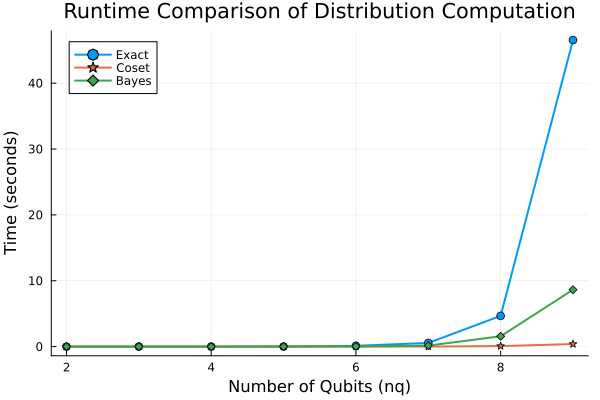

In [5]:
nq_range = 2:9
times_exact = Float64[]
times_coset = Float64[]
times_bayes = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_exact = @elapsed PauliSampling.get_dist(exact_psum, approximate_prob)
    t_coset = @elapsed PauliSampling.get_dist(trunc_psum, projection_prob)
    t_bayes = @elapsed PauliSampling.get_dist(trunc_psum, approximate_prob)

    push!(times_exact, t_exact)
    push!(times_coset, t_coset)
    push!(times_bayes, t_bayes)
end

# Plotting
plot(nq_range, times_exact, label="Exact", lw=2, marker=:o)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
plot!(nq_range, times_bayes, label="Bayes", lw=2, marker=:d)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtime Comparison of Distribution Computation")

In [ ]:
nq_range = 2:11
times_exact = Float64[]
times_coset = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_exact = @elapsed PauliSampling.get_dist(exact_psum, projection_prob)
    t_coset = @elapsed PauliSampling.get_dist(trunc_psum, projection_prob)

    push!(times_exact, t_exact)
    push!(times_coset, t_coset)
end

# Plotting
plot(nq_range, times_exact, label="Exact", lw=2, marker=:o)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtimeof Exact Distribution Computation")

Running nq = 2
Running nq = 3
Running nq = 4
Running nq = 5
Running nq = 6
Running nq = 7
Running nq = 8
Running nq = 9


In [ ]:
nq_range = 2:9
times_exact = Float64[]
times_coset = Float64[]
times_bayes = Float64[]

for nq in nq_range
    println("Running nq = $nq")
    
    init_psum = zero_state(nq)
    max_weight = min(max(1, nq ÷ 2), 4)
    circuit_nq = build_circuit(nq)
    nparams = countparameters(circuit_nq)
    thetas = randn(nparams) * 0.5

    exact_psum = propagate(circuit_nq, init_psum, thetas)
    trunc_psum = propagate(circuit_nq, init_psum, thetas; max_weight=max_weight)

    # Time each get_dist call
    t_exact = @elapsed PauliSampling.get_dist(exact_psum, approximate_prob)
    t_coset = @elapsed PauliSampling.get_dist(trunc_psum, projection_prob)
    t_bayes = @elapsed PauliSampling.get_dist(trunc_psum, approximate_prob)

    push!(times_exact, t_exact)
    push!(times_coset, t_coset)
    push!(times_bayes, t_bayes)
end

# Plotting
plot(nq_range, times_exact, label="Exact", lw=2, marker=:o, yaxis=:log)
plot!(nq_range, times_coset, label="Coset", lw=2, marker=:s)
plot!(nq_range, times_bayes, label="Bayes", lw=2, marker=:d)
xlabel!("Number of Qubits (nq)")
ylabel!("Time (seconds)")
title!("Runtime Comparison of Distribution Computation")